Car Search Capstone 
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Section 1. Data Cleaning
----

Read in the cars_2019 price data, a csv file. Examine the shape, head, and tail.
----

In [2]:
price_data = pd.read_csv("../data/cars_2019.csv")
price_data.head(5)

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)",...,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,255,45.0,V,20.0
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0


In [3]:
price_data.tail(5)

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)",...,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
32311,45700.0,22.0,l4,AWD,5,4,3920.0,93.0,109.2,62.1,...,NaN,4.0,150000.0,Volvo,2018,Car,235,50.0,V,18.0
32312,41200.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2016,Car,235,50.0,V,18.0
32313,44850.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2016,Car,235,50.0,V,18.0
32314,41000.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2015,Car,235,50.0,V,18.0
32315,44650.0,20.0,l5,AWD,5,4,3602.0,93.0,109.3,62.1,...,NaN,4.0,150000.0,Volvo,2015,Car,235,50.0,V,18.0


In [4]:
price_data.shape

(32316, 56)

In [5]:
price_data.columns

Index(['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Engine', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Base Curb Weight (lbs)',
       'Passenger Volume (ft³)', 'Wheelbase (in)', 'Track Width, Front (in)',
       'Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)',
       'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
       'Displacement', 'Trans Description Cont.', 'Trans Type',
       'Suspension Type - Front', 'Suspension Type - Rear',
       'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control',
       'Basic Miles/km', 'Basic 

Drop price columns that will not be analyzed
---

In [6]:
price_data = price_data.drop(['Front tire speed ratings/cons.type', 'SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM', 'Basic Miles/km', 'Basic Years', 'Drivetrain Miles/km', 'Turning Diameter - Curb to Curb (ft)', 'Front Wheel Material', 'Wheelbase (in)', 'Stabilizer Bar Diameter - Front (in)', 'Front tire width', 'Front tire aspect ratio', 'Height, Overall (in)', 'Passenger Volume (ft³)', 'Track Width, Front (in)', 'Base Curb Weight (lbs)', 'Drivetrain Years', 'Front tire rim size', 'Front tire width', 'Front tire aspect ratio'], axis = 1)
price_data

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,"Fuel Tank Capacity, Approx (gal)",Fuel System,Displacement,Trans Description Cont.,...,Tire Pressure Monitor,Back-Up Camera,Stability Control,Corrosion Miles/km,Corrosion Years,Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category
0,40600.0,22.0,l4,FWD,5,4,17.1,DI,2.0,Automatic,...,1,1,1,150000.0,5.0,NaN,50000.0,Acura,2019,SUV
1,45500.0,22.0,l4,FWD,5,4,17.1,DI,2.0,Automatic,...,1,1,1,150000.0,5.0,NaN,50000.0,Acura,2019,SUV
2,43600.0,22.0,l4,FWD,5,4,17.1,DI,2.0,Automatic,...,1,1,1,150000.0,5.0,NaN,50000.0,Acura,2019,SUV
3,37400.0,22.0,l4,FWD,5,4,17.1,DI,2.0,Automatic,...,1,1,1,150000.0,5.0,NaN,50000.0,Acura,2019,SUV
4,42600.0,21.0,l4,AWD,5,4,17.1,DI,2.0,Automatic,...,1,1,1,150000.0,5.0,NaN,50000.0,Acura,2019,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32311,45700.0,22.0,l4,AWD,5,4,NaN,DI,2.0,Automatic,...,1,1,1,150000.0,12.0,4.0,150000.0,Volvo,2018,Car
32312,41200.0,20.0,l5,AWD,5,4,NaN,SFI,2.5,Automatic,...,1,0,1,150000.0,12.0,4.0,150000.0,Volvo,2016,Car
32313,44850.0,20.0,l5,AWD,5,4,NaN,SFI,2.5,Automatic,...,1,1,1,150000.0,12.0,4.0,150000.0,Volvo,2016,Car
32314,41000.0,20.0,l5,AWD,5,4,NaN,SFI,2.5,Automatic,...,1,0,1,150000.0,12.0,4.0,150000.0,Volvo,2015,Car


In [7]:
price_data.columns

Index(['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Engine', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors',
       'Fuel Tank Capacity, Approx (gal)', 'Fuel System', 'Displacement',
       'Trans Description Cont.', 'Trans Type', 'Suspension Type - Front',
       'Suspension Type - Rear', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Corrosion Miles/km', 'Corrosion Years',
       'Roadside Assistance Years', 'Roadside Assistance Miles/km',
       'Manufacturer', 'Model year', 'Category'],
      dtype='object')

In [8]:
#Save cleaned data for tableau
price_data.to_csv('../data/tab_price_data.csv', index = False)

Read in the Cary crash data, a csv file.  Examine the shape, head, and tail.
----

In [9]:
crash_data = pd.read_csv("../data/crash_data.csv", sep = ";")
crash_data.head(5)
#Received an error without appropriate could for ; after reviewing the data

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,...,fatalities,injuries,month,contrfact1,contrfact2,contributing_factor,vehicleconcat1,vehicleconcat2,vehicleconcat3,vehicle_type
0,48493,15 FEET FROM US 64 HWY,FOUR-WAY INTERSECTION,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,No,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY","PASSENGER CAR,SPORT UTILITY"
1,48494,0.2 MILES FROM SR 1300 (KILDAIRE FARM RD),NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",COARSE ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,No,7,NONE,"NONE,NONE","NONE,NONE",PASSENGER CAR,PASSENGER CAR,PASSENGER CAR,PASSENGER CAR
2,48495,.25 MILES FROM US 64 HWY,NO SPECIAL FEATURE,"STRAIGHT,GRADE",US ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,No,7,NONE,"NONE,NONE","NONE,NONE","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY","SPORT UTILITY,SPORT UTILITY"
3,48500,CARY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,...,No,Yes,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"
4,48507,CARY,FOUR-WAY INTERSECTION,"STRAIGHT,BOTTOM (SAG)",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,Yes,7,NaN,NONE,NONE,"PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"


In [10]:
crash_data.tail(5)

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,...,fatalities,injuries,month,contrfact1,contrfact2,contributing_factor,vehicleconcat1,vehicleconcat2,vehicleconcat3,vehicle_type
23477,48438,495 FEET FROM NC 54 HWY (CHAPEL HILL RD),NO SPECIAL FEATURE,"CURVE,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,No,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"
23478,48442,90 FEET FROM PVA OF 1405 KILDAIRE FARM RD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,...,No,No,7,NaN,NONE,NONE,POLICE,POLICE,POLICE,POLICE
23479,48464,40 FEET FROM P.V.A. (200 WESTOVER HILLS DR),NO SPECIAL FEATURE,"STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,No,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)","PASSENGER CAR,SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)","PASSENGER CAR,SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)","PASSENGER CAR,SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)"
23480,48485,CARY,RELATED TO INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,No,No,7,NONE,"NONE,NONE","NONE,NONE","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR","PASSENGER CAR,PASSENGER CAR"
23481,48486,78 FEET FROM SR 3073 (NW MAYNARD RD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
crash_data.shape

(23482, 47)

In [12]:
crash_data.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'numpassengers', 'numpedestrians',
       'contrcir1_desc', 'contrcir2_desc', 'contrcir3_desc', 'contrcir4_desc',
       'vehicle1', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5', 'workarea',
       'records', 'ta_date', 'ta_time', 'crash_date', 'geo_location', 'year',
       'fatalities', 'injuries', 'month', 'contrfact1', 'contrfact2',
       'contributing_factor', 'vehicleconcat1', 'vehicleconcat2',
       'vehicleconcat3', 'vehicle_type'],
      dtype='object')

In [13]:
crash_data['month'] = crash_data['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
print(crash_data)

       tamainid                         location_description  \
0         48493                       15 FEET FROM US 64 HWY   
1         48494    0.2 MILES FROM SR 1300 (KILDAIRE FARM RD)   
2         48495                     .25 MILES FROM US 64 HWY   
3         48500                                         CARY   
4         48507                                         CARY   
...         ...                                          ...   
23477     48438     495 FEET FROM NC 54 HWY (CHAPEL HILL RD)   
23478     48442    90 FEET FROM PVA OF 1405 KILDAIRE FARM RD   
23479     48464  40 FEET FROM P.V.A. (200 WESTOVER HILLS DR)   
23480     48485                                         CARY   
23481     48486         78 FEET FROM SR 3073 (NW MAYNARD RD)   

                     rdfeature            rdcharacter                rdclass  \
0        FOUR-WAY INTERSECTION         STRAIGHT,LEVEL               US ROUTE   
1           NO SPECIAL FEATURE         STRAIGHT,LEVEL  STATE SECONDARY 

Drop crash columns that will not be analyzed
---

In [14]:
crash_data = crash_data.drop(['geo_location', 'fatality', 'possblinj', 'numpassengers', 'numpedestrians', 'contrcir1_desc', 'contrcir2_desc', 'contrcir3_desc', 'contrcir4_desc', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5', 'workarea', 'records', 'ta_date', 'ta_time', 'crash_date', 'tract', 'zone', 'trafcontrl', 'lat', 'lon', 'tamainid', 'location_description', 'rdcharacter', 'rdclass', 'rdconfigur', 'contrfact1', 'contrfact2','contributing_factor', 'vehicleconcat1', 'vehicleconcat2', 'vehicleconcat3', 'vehicle_type'], axis = 1)
crash_data

,rdfeature,rdsurface,rdcondition,lightcond,weather,lon2,lat2,vehicle1,year,fatalities,injuries,month
0,FOUR-WAY INTERSECTION,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,-78.798201,35.738825,PASSENGER CAR,2021,No,No,July
1,NO SPECIAL FEATURE,COARSE ASPHALT,DRY,DAYLIGHT,CLEAR,-78.794249,35.706033,PASSENGER CAR,2021,No,No,July
2,NO SPECIAL FEATURE,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,-78.796560,35.738490,SPORT UTILITY,2021,No,No,July
3,NO SPECIAL FEATURE,SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,-78.782944,35.758003,PASSENGER CAR,2021,No,Yes,July
4,FOUR-WAY INTERSECTION,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,-78.763900,35.788000,PASSENGER CAR,2021,No,Yes,July
...,...,...,...,...,...,...,...,...,...,...,...,...
23477,NO SPECIAL FEATURE,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,-78.801000,35.799000,PASSENGER CAR,2021,No,No,July
23478,"DRIVEWAY, PUBLIC",SMOOTH ASPHALT,DRY,DAYLIGHT,CLOUDY,-78.782663,35.757224,POLICE,2021,No,No,July
23479,NO SPECIAL FEATURE,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,-78.777000,35.819600,PASSENGER CAR,2021,No,No,July
23480,RELATED TO INTERSECTION,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,-78.737419,35.745711,PASSENGER CAR,2021,No,No,July


In [15]:
crash_data.columns

Index(['rdfeature', 'rdsurface', 'rdcondition', 'lightcond', 'weather', 'lon2',
       'lat2', 'vehicle1', 'year', 'fatalities', 'injuries', 'month'],
      dtype='object')

In [16]:
#Add a "Category" column of SUV or Car to crash data

In [17]:
#Save cleaned data for tableau
crash_data.to_csv('../data/tab_crash_data.csv', index = False)

Section 2. Analyze Data
---

Examine price value counts by category
----

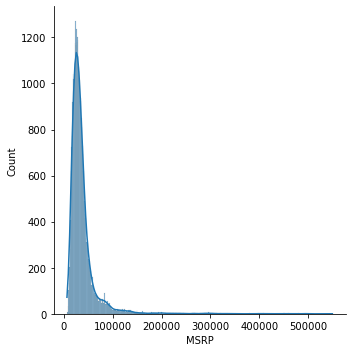

In [18]:
#Price distribution of cars based on MSRP
#MSRP stands for Manufacturer Suggested Retail Price and it's the figure that the manufacturer 
#recommends dealerships sell a vehicle at.

sns.displot(price_data['MSRP'],kde=True)

In [19]:
cat_count = price_data.Category.value_counts()
cat_count

Car       13829
Pickup     7750
SUV        7719
Van        1302
Name: Category, dtype: int64

In [20]:
#y_pos = np.arange(len(Category))

# Create bars
#plt.bar(y_pos, height)

# Create names on the x-axis
#plt.xticks(y_pos, bars)

# Show graphic
#plt.show()

Examine crash value counts by category
----

In [21]:
crash_data.rdcondition.value_counts()

DRY                         19457
WET                          3104
UNKNOWN                        95
ICE                            76
WATER (STANDING, MOVING)       69
SNOW                           49
SLUSH                          20
SAND, MUD, DIRT, GRAVEL        20
OTHER *                         5
FUEL, OIL                       1
Name: rdcondition, dtype: int64

In [22]:
crash_data.month.value_counts()

March        2152
October      2133
January      2115
May          2080
November     2040
December     2002
February     1929
August       1925
April        1908
September    1792
June         1756
July         1650
Name: month, dtype: int64

In [23]:
crash_data.fatalities.value_counts()

No     23440
Yes       42
Name: fatalities, dtype: int64

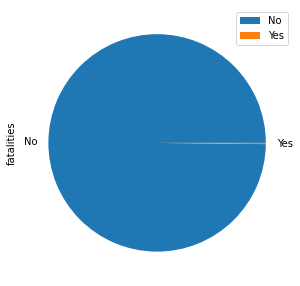

In [24]:
fatal_df=pd.DataFrame(crash_data['fatalities'].value_counts())
plot = fatal_df.plot.pie(y='fatalities', figsize=(5, 5))

In [25]:
crash_data.injuries.value_counts()

No     20431
Yes     3051
Name: injuries, dtype: int64

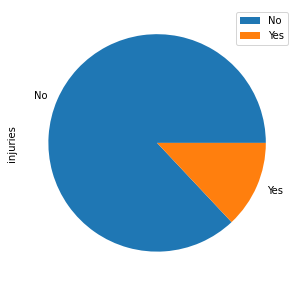

In [26]:
inj_df=pd.DataFrame(crash_data['injuries'].value_counts())
plot = inj_df.plot.pie(y='injuries', figsize=(5, 5))

Merge the price and crash data
-----